In [74]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
from torchsummary import summary
import torchutils as tu
import json
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Устанавливаем устройство для вычислений
device = "mps"


In [29]:
# Импортируем модели Inception V3 из torchvision.models
from torchvision.models import inception_v3, Inception_V3_Weights


In [55]:
# Создаем экземпляр модели Inception V3 с весами, обученными на наборе данных ImageNet
model = inception_v3(weights='IMAGENET1K_V1')

# Переносим модель на используемое устройство (например, GPU или CPU)
model.to(device)

# Устанавливаем модель в режим оценки (evaluation mode).
# В режиме оценки модель не будет обучаться и будет использовать сохраненные параметры
model.eval()


In [67]:
# Создаем экземпляр класса Resize из модуля torchvision.transforms
resize = T.Resize((224, 224))

В этом коде мы создаем экземпляр класса `Resize` из модуля `torchvision.transforms`. Этот класс позволяет изменять размеры изображений. Мы указываем желаемые размеры в виде `(224, 224)`, то есть мы хотим изменить размер изображения до 224 пикселей по ширине и 224 пикселей по высоте.

In [89]:
# Считываем изображение по указанному пути '/Users/sergey/Downloads/Unknown.jpeg' с помощью функции io.read_image()
# Нормализуем значения пикселей изображения, разделив их на 255, чтобы привести их в диапазон от 0 до 1
# Изменяем размер изображения с помощью функции resize() из модуля skimage.transform
img = resize(io.read_image('/Users/sergey/Downloads/Unknown.jpeg')/255)

(-0.5, 223.5, 223.5, -0.5)

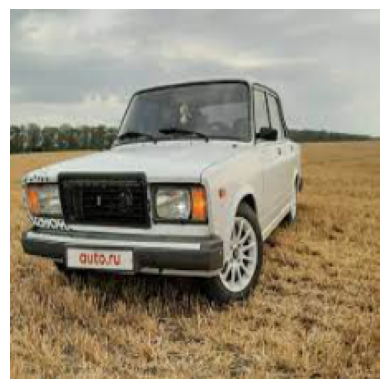

In [91]:
plt.imshow(torch.permute(img, (1,2,0)))
plt.axis('off')

In [92]:
# делаем словарь, чтобы по индексу найти название класса
labels = json.load(open('/Users/sergey/Downloads/imagenet_class_index.json'))
# функция декодировки
decode = lambda x: labels[str(x)][1]

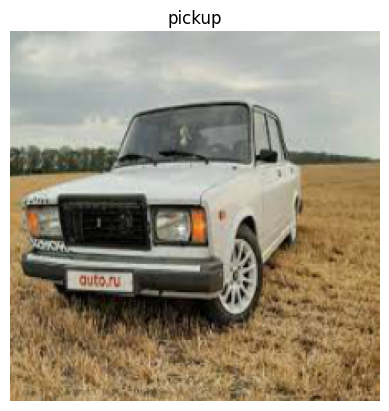

In [94]:
# Отобразить изображение при помощи функции plt.imshow()
plt.imshow(torch.permute(img, (1, 2, 0)))

# Убрать отображение осей на графике с помощью функции plt.axis('off')
plt.axis('off')

# Установить заголовок для графика, используя результат декодирования и классификации изображения
plt.title(decode(model(img.to(device).unsqueeze(0)).argmax().item()))
